Sky Kapoor and Chris Compierchio

This program will code and plot the Crank-Nicolson method for the wave equation in the time-dependent Schrodinger equation
in the case of an infinite square well.

In [61]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as c
plt.rcParams.update({'font.size': 16})

PART A

In [24]:
#Define constants and necessary time/position ranges
L = 10**-8
m = 9.109*10**-31
sigma = L/25
kappa = 500/L
x0 = L/5
tau = 10**-18
N = 3000
T = np.arange(tau, (N+1)*tau, tau)
x = np.linspace(-L/2, L/2, 1024)
x = x[1:-1]
dx = x[1] - x[0]

#Define a function that will normalize the wavefunction
def normalize(p):
    return np.sqrt(np.sum(np.conj(p)*p*dx))

#Initialize and normalizethe wavefunction
psi_initial = np.exp(-(x-x0)**2/(4*sigma)**2 + 1j*kappa*x)
psi_initial = psi_initial/normalize(psi_initial)

#Calculate the potential
V = np.zeros(1022)
V[:] = .5*m*((2*np.pi/(N*tau))**2)*x**2

#Calculate the Hamiltonian
C = np.diag(V-2*(-c.hbar**2/(2*m*dx**2)), k = 0)
upper = -c.hbar**2/(2*m*dx**2)*np.eye(1022, k=1)
lower = -c.hbar**2/(2*m*dx**2)*np.eye(1022, k=-1)
H = C + upper + lower

left = np.eye(1022) + 1j*tau/(2*c.hbar)*H
right = np.eye(1022) - 1j*tau/(2*c.hbar)*H

#Initilize arrays to store psis, energies, and x positions
psi = []
xs = []
energy = []
psis = np.zeros((len(T) + 1, len(psi_initial)))
psis[0] = psi_initial

#Loop through T to calculate Psi 
num = 0
for i in T:
    v = np.matmul(right, psi_initial)
    psi_initial = np.linalg.solve(left, v)
    psi.append(normalize(psi_initial))
    e = np.matmul(H, psi_initial)
    e = np.conj(psi_initial)*e
    e = np.sum(e*dx)
    energy.append(e)
    xs.append(np.sum(np.conj(psi_initial)*x*psi_initial*dx))
    psis[num] = psi_initial
    num+=1


<ipython-input-24-01e9115e4908>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  psis[0] = psi_initial
<ipython-input-24-01e9115e4908>:53: ComplexWarning: Casting complex values to real discards the imaginary part
  psis[num] = psi_initial


PART B

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


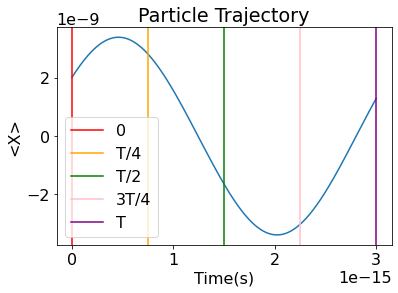

In [25]:
#Plot trajectory
plt.plot(T, xs)
plt.axvline(x = T[0], color="red", label = "0")
plt.axvline(x = T[int(len(T)/4)], color = "orange", label = "T/4")
plt.axvline(x = T[int(len(T)/2)], color = "green", label = "T/2")
plt.axvline(x = T[int(3*len(T)/4)], color = "pink", label = "3T/4")
plt.axvline(x = T[int(len(T))-1], color = "purple", label = "T")

plt.title("Particle Trajectory")
plt.xlabel("Time(s)")
plt.ylabel("<X>")
plt.legend(loc="best")
plt.show()

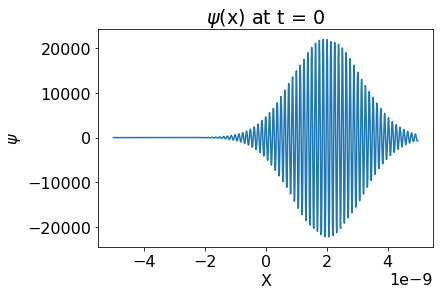

In [16]:
#Plot psi at t=0
plt.plot(x, np.real(psis[int(0)]))
plt.title("$\psi$(x) at t = 0")
plt.xlabel("X")
plt.ylabel("$\psi$")
plt.show()

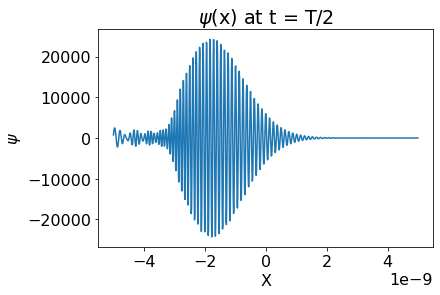

In [27]:
#Plot psi at t=T/2
plt.plot(x, np.real(psis[int(len(T)/2)]))
plt.title("$\psi$(x) at t = T/2")
plt.xlabel("X")
plt.ylabel("$\psi$")
plt.show()

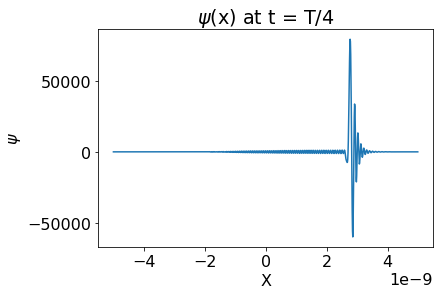

In [18]:
#Plot psi at t=T/4
plt.plot(x, np.real(psis[int(len(T)/4)]))
plt.title("$\psi$(x) at t = T/4")
plt.xlabel("X")
plt.ylabel("$\psi$")
plt.show()

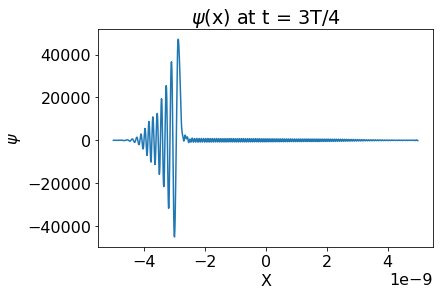

In [19]:
#Plot psi at t=3T/4
plt.plot(x, np.real(psis[int(len(T)*3/4)]))
plt.title("$\psi$(x) at t = 3T/4")
plt.xlabel("X")
plt.ylabel("$\psi$")
plt.show()

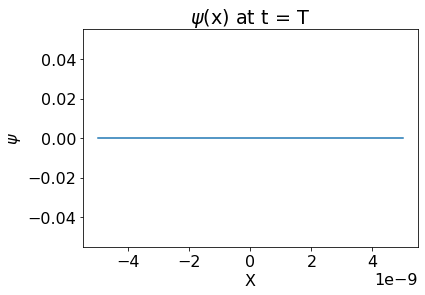

In [20]:
#Plot psi at t=T
plt.plot(x, np.real(psis[int(len(T))]))
plt.title("$\psi$(x) at t = T")
plt.xlabel("X")
plt.ylabel("$\psi$")
plt.show()

PART C

C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


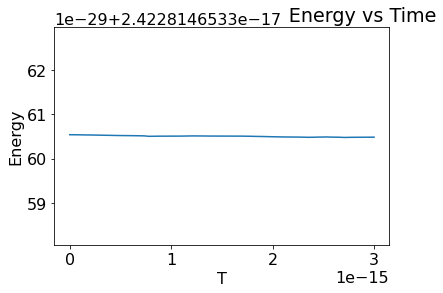

In [34]:
#Plot Energy
plt.plot(T, energy)
plt.title("                                              Energy vs Time")
plt.xlabel("T")
plt.ylabel("Energy")
plt.show()

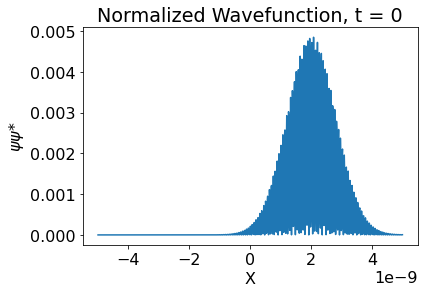

In [56]:
#Plot Normalized Wave Function for t = 0
plt.plot(x, (psis[0]*np.conj(psis)[0]*dx))
plt.title("Normalized Wavefunction, t = 0")
plt.xlabel("X")
plt.ylabel("$\psi$$\psi$*")
plt.show()

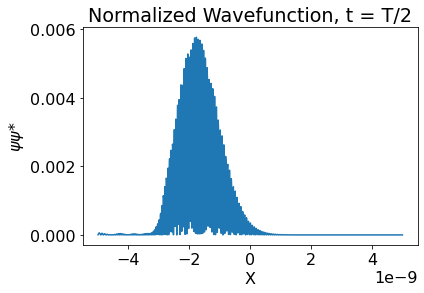

In [57]:
#Plot Normalized Wave Function for t = T/2
plt.plot(x, (psis[int(len(T)/2)]*np.conj(psis)[int(len(T)/2)]*dx))
plt.title("Normalized Wavefunction, t = T/2")
plt.xlabel("X")
plt.ylabel("$\psi$$\psi$*")
plt.show()

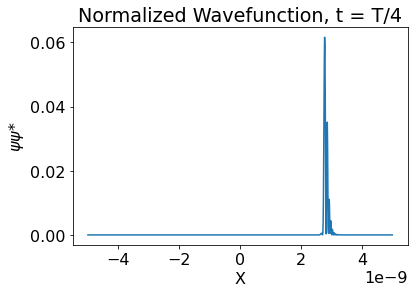

In [58]:
#Plot Normalized Wave Function for t = T/4
plt.plot(x, (psis[int(len(T)/4)]*np.conj(psis)[int(len(T)/4)]*dx))
plt.title("Normalized Wavefunction, t = T/4")
plt.xlabel("X")
plt.ylabel("$\psi$$\psi$*")
plt.show()

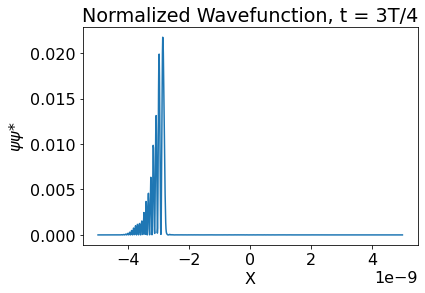

In [59]:
#Plot Normalized Wave Function for t = 3T/4
plt.plot(x, (psis[int(3*len(T)/4)]*np.conj(psis)[int(3*len(T)/4)]*dx))
plt.title("Normalized Wavefunction, t = 3T/4")
plt.xlabel("X")
plt.ylabel("$\psi$$\psi$*")
plt.show()

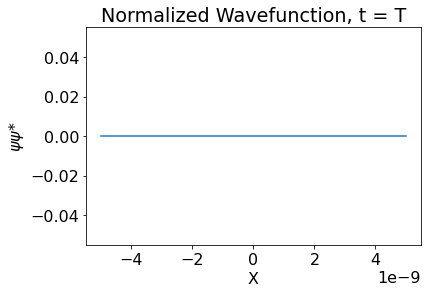

In [60]:
#Plot Normalized Wave Function for t = T
plt.plot(x, (psis[int(len(T))]*np.conj(psis)[int(len(T))]*dx))
plt.title("Normalized Wavefunction, t = T")
plt.xlabel("X")
plt.ylabel("$\psi$$\psi$*")
plt.show()